In [ ]:
# Instalación de Pyomo como paquete de modelado
!pip install -q pyomo

     |████████████████████████████████| 11.1 MB 7.5 MB/s 
     |████████████████████████████████| 49 kB 3.8 MB/s 


In [ ]:
# Instalación el solver glpk para problemas lineales (continuos y enteros)
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Setting up libcolamd2:amd64 (1:5.1.2-2) ...
Setting up libamd2:amd64 

In [ ]:
# Instalación el solver cbc para problemas lineales (continuos y enteros)
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 124219 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [ ]:
# Instalación el solver ipopt para problemas lineales (continuos y enteros) - método del punto interior
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [ ]:
# Instalación el solver bonmin para problemas no lineales (continuos y enteros)
!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64

In [ ]:
# Importación de los paquetes de Python
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
def cargarModelo():

    # Genero problema lineal continuo en pyomo

    # max f1 = X1 
    # max f2 = 3 X1 + 4 X2 
    # st  X1 <= 20 
    #     X2 <= 40 
    #     5 X1 + 4 X2 <= 200 
    #     X >= 0

    model = ConcreteModel()

    model.X1 = Var(within=NonNegativeReals)
    model.X2 = Var(within=NonNegativeReals)

    model.C1 = Constraint(expr = model.X1 <= 20)
    model.C2 = Constraint(expr = model.X2 <= 40)
    model.C3 = Constraint(expr = 5 * model.X1 + 4 * model.X2 <= 200)

    model.f1 = Var()
    model.f2 = Var()
    model.C_f1 = Constraint(expr= model.f1 == model.X1)
    model.C_f2 = Constraint(expr= model.f2 == 3 * model.X1 + 4 * model.X2)
    model.O_f1 = Objective(expr= model.f1  , sense=maximize)
    model.O_f2 = Objective(expr= model.f2  , sense=maximize)

    return model

In [ ]:
def cargarModelo_int():

    # Genero problema lineal entero en pyomo

    # max f1 = X1 
    # max f2 = 3 X1 + 4 X2 
    # st  X1 <= 20 
    #     X2 <= 40 
    #     5 X1 + 4 X2 <= 200 
    #     X entero

    model = ConcreteModel()

    model.X1 = Var(within=NonNegativeIntegers)
    model.X2 = Var(within=NonNegativeIntegers)

    model.C1 = Constraint(expr = model.X1 <= 20)
    model.C2 = Constraint(expr = model.X2 <= 40)
    model.C3 = Constraint(expr = 5 * model.X1 + 4 * model.X2 <= 200)

    model.f1 = Var()
    model.f2 = Var()
    model.C_f1 = Constraint(expr= model.f1 == model.X1)
    model.C_f2 = Constraint(expr= model.f2 == 3 * model.X1 + 4 * model.X2)
    model.O_f1 = Objective(expr= model.f1  , sense=maximize)
    model.O_f2 = Objective(expr= model.f2  , sense=maximize)

    return model

In [ ]:
def cargarModelo_nl():

    # Genero problema no lineal continuo en pyomo

    # max f1 = X1 * X1
    # max f2 = 3 X1 + 4 X2 
    # st  X1 <= 20 
    #     X2 <= 40 
    #     5 X1 + 4 X2 <= 200 
    #     X >= 0

    model = ConcreteModel()

    model.X1 = Var(within=NonNegativeIntegers)
    model.X2 = Var(within=NonNegativeIntegers)

    model.C1 = Constraint(expr = model.X1 <= 20)
    model.C2 = Constraint(expr = model.X2 <= 40)
    model.C3 = Constraint(expr = 5 * model.X1 + 4 * model.X2 <= 200)

    model.f1 = Var()
    model.f2 = Var()
    model.C_f1 = Constraint(expr= model.f1 == model.X1 * model.X1)
    model.C_f2 = Constraint(expr= model.f2 == 3 * model.X1 + 4 * model.X2)
    model.O_f1 = Objective(expr= model.f1  , sense=maximize)
    model.O_f2 = Objective(expr= model.f2  , sense=maximize)

    return model

In [ ]:
def cargarModelo_nl_int():

    # Genero problema no lineal entero en pyomo

    # max f1 = X1 * X1
    # max f2 = 3 X1 + 4 X2 
    # st  X1 <= 20 
    #     X2 <= 40 
    #     5 X1 + 4 X2 <= 200 
    #     X entero

    model = ConcreteModel()

    model.X1 = Var(within=NonNegativeIntegers)
    model.X2 = Var(within=NonNegativeIntegers)

    model.C1 = Constraint(expr = model.X1 <= 20)
    model.C2 = Constraint(expr = model.X2 <= 40)
    model.C3 = Constraint(expr = 5 * model.X1 + 4 * model.X2 <= 200)

    model.f1 = Var()
    model.f2 = Var()
    model.C_f1 = Constraint(expr= model.f1 == model.X1 * model.X1)
    model.C_f2 = Constraint(expr= model.f2 == 3 * model.X1 + 4 * model.X2)
    model.O_f1 = Objective(expr= model.f1  , sense=maximize)
    model.O_f2 = Objective(expr= model.f2  , sense=maximize)

    return model

In [ ]:
def encontrarExtremos(model):

    # Para usar glpk
    solver = SolverFactory('glpk')
    # Opciones para glpk
    solver.options = {'tmlim': 20, 'mipgap': 0.00}

    # Para usar CBC
    #solver = SolverFactory('cbc')
    # Opciones para CBC
    #solver.options = {'sec': 20, 'threads': 6, 'ratio': 0.00}

    # Maximizo f1 libremente
    model.O_f2.deactivate()
    model.O_f1.activate()

    solver.solve(model, tee=False)

    print('Extremo 1')
    print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
    print( 'f1 = ' + str(value(model.f1)) )
    print( 'f2 = ' + str(value(model.f2)) )
    f2_min = value(model.f2)
    f1_max = value(model.f1)

    # Maximizo f2 libremente
    model.O_f2.activate()
    model.O_f1.deactivate()

    solver.solve(model, tee=False);

    print('Extremo 2')
    print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
    print( 'f1 = ' + str(value(model.f1)) )
    print( 'f2 = ' + str(value(model.f2)) )
    f2_max = value(model.f2)
    f1_min = value(model.f1)

    model.O_f1.activate()

    return f2_min, f2_max, f1_min, f1_max, solver

In [ ]:
model = cargarModelo()
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremos(model)

In [ ]:
def encontrarExtremosLexicographic(model):

    # Para usar glpk
    #solver = SolverFactory('glpk')
    # Opciones para glpk
    #solver.options = {'tmlim': 20, 'mipgap': 0.02}

    # Para usar CBC
    solver = SolverFactory('cbc')
    # Opciones para CBC
    #solver.options = {'sec': 20, 'threads': 6, 'ratio': 0.02}

    # Maximizo f1 libremente
    model.O_f2.deactivate()
    model.O_f1.activate()

    solver.solve(model)

    print('Extremo 1')
    print('Primer paso')
    print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
    print( 'f1 = ' + str(value(model.f1)) )
    print( 'f2 = ' + str(value(model.f2)) )
    f1_max = value(model.f1)

    # Maximizo f2 sujeto a que f1 no empeore
    model.O_f2.activate()
    model.O_f1.deactivate()
    model.C_epsilon = Constraint(expr = model.f1 >= f1_max)

    solver.solve(model)

    print('Segundo paso')
    print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
    print( 'f1 = ' + str(value(model.f1)) )
    print( 'f2 = ' + str(value(model.f2)) )
    
    # Tomo el mínimo de f2 sobre el frente de Pareto
    f2_min = value(model.f2)
    # Elimino restricción que impide empeorar a f1 para volver 
    # el modelo a su estado original
    model.del_component(model.C_epsilon)

    # Maximizo f2 libremente
    model.O_f1.deactivate()
    model.O_f2.activate()

    solver.solve(model)

    print('Extremo 2')
    print('Primer paso')
    print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
    print( 'f1 = ' + str(value(model.f1)) )
    print( 'f2 = ' + str(value(model.f2)) )
    f2_max = value(model.f2)

    # Maximizo f1 sujeto a que f2 no empeore
    model.O_f1.activate()
    model.O_f2.deactivate()
    model.C_epsilon = Constraint(expr = model.f2 >= f2_max)
    
    solver.solve(model)

    print('Segundo paso')
    print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
    print( 'f1 = ' + str(value(model.f1)) )
    print( 'f2 = ' + str(value(model.f2)) )

    # Tomo el mínimo de f1 sobre el frente de Pareto
    f1_min = value(model.f1)
    # Elimino restricción que impide empeorar a f2 para volver 
    # el modelo a su estado original
    model.del_component(model.C_epsilon)

    model.O_f1.activate()

    return f2_min, f2_max, f1_min, f1_max, solver

In [ ]:
model = cargarModelo_nl()
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremosLexicographic(model)

Extremo 1
Primer paso
( X1 , X2 ) = ( 20.0 , 0.0 )
f1 = 400.0
f2 = 60.0
Segundo paso
( X1 , X2 ) = ( 20.0 , 25.0 )
f1 = 399.999999999988
f2 = 160.0000000000066
Extremo 2
Primer paso
( X1 , X2 ) = ( 8.0 , 40.0 )
f1 = 64.00000000000108
f2 = 184.00000000000153
Segundo paso
( X1 , X2 ) = ( 8.0 , 40.0 )
f1 = 64.00000000091299
f2 = 183.99999999994532


In [ ]:
def applyNormalizedWeightingSum(model, f2_min, f2_max, f1_min, f1_max, solver, n):

    # Aplicar Programación por compromiso normalizada

    model.O_f1.deactivate()
    model.O_f2.deactivate()

    # Creo vectores de pesos
    model.w1 = Param(initialize=0, mutable=True, within = NonNegativeReals)
    model.w2 = Param(initialize=0, mutable=True, within = NonNegativeReals)

    # Creo nueva función objetivo en base a las sumas ponderadas
    model.O_f = Objective(expr= ( (f1_max - model.f1)/(f1_max - f1_min) ) * model.w1 + ( (f2_max - model.f2)/(f2_max - f2_min) ) * model.w2 , sense=minimize)

    # Genero el paso con el que variaré los pesos
    step = 1/n

    x1_l = []
    x2_l = []
    f1_l = []
    f2_l = []

    # Aplico el proceso iterativo para realizar la búsqueda de las n soluciones
    for i in range(n):

        # Varío los pesos
        model.w1 = i * step
        cte =  i * step
        model.w2 = 1 - cte

        solver.solve(model)

        x1_l.append(value(model.X1))
        x2_l.append(value(model.X2))        
        f1_l.append(value(model.f1))
        f2_l.append(value(model.f2))

        print("Sol vars - it:" + str(i) + " x1= " + str(x1_l[len(x1_l)-1]) + " x2= " + str(x2_l[len(x2_l)-1]))
        print("Sol FO - it:" + str(i) + " f1= " + str(f1_l[len(f1_l)-1]) + " f2= " + str(f2_l[len(f2_l)-1]))

    # Para graficar el frente de Pareto hallado en el espacio de decisiones o variables
    plt.plot(x1_l,x2_l,'o-.')
    plt.plot(0,0,'x-.')
    plt.title('Normalized Weighted Sum Pareto-front Vars')
    plt.xlabel("X1", fontsize = 10)
    plt.ylabel("X2", fontsize = 10) 
    plt.grid(True)
    plt.savefig("Normalized Weighted Sum - Vars", dpi = 600, bbox_inches="tight")
    plt.show()
    plt.close()

    # Para graficar el frente de Pareto hallado en el espacio de búsqueda o de objetivos
    plt.plot(f1_l,f2_l,'o-.')
    plt.plot(0,0,'x-.')
    plt.title('Normalized Weighted Sum Pareto-front FO')
    plt.xlabel("f1", fontsize = 10)
    plt.ylabel("f2", fontsize = 10)    
    plt.grid(True)
    plt.savefig("Normalized Weighted Sum - FO", dpi = 600, bbox_inches="tight")
    plt.show()
    # Comando que permite descargar la imagen
    # files.download("Normalized Weighted Sum - FO.png") 
    plt.close()

    # Vuelvo el modelo a su estado original
    model.del_component(model.O_f)
    model.del_component(model.w1)
    model.del_component(model.w2)
    model.O_f1.activate()
    model.O_f2.activate()

Extremo 1
Primer paso
( X1 , X2 ) = ( 20.0 , 0.0 )
f1 = 20.0
f2 = 60.0
Segundo paso
( X1 , X2 ) = ( 20.0 , 25.0 )
f1 = 20.0
f2 = 160.0
Extremo 2
Primer paso
( X1 , X2 ) = ( 8.0 , 40.0 )
f1 = 8.0
f2 = 184.0
Segundo paso
( X1 , X2 ) = ( 8.0 , 40.0 )
f1 = 8.0
f2 = 184.0
Sol vars - it:0 x1= 8.0 x2= 40.0
Sol FO - it:0 f1= 8.0 f2= 184.0
Sol vars - it:1 x1= 8.0 x2= 40.0
Sol FO - it:1 f1= 8.0 f2= 184.0
Sol vars - it:2 x1= 8.0 x2= 40.0
Sol FO - it:2 f1= 8.0 f2= 184.0
Sol vars - it:3 x1= 8.0 x2= 40.0
Sol FO - it:3 f1= 8.0 f2= 184.0
Sol vars - it:4 x1= 8.0 x2= 40.0
Sol FO - it:4 f1= 8.0 f2= 184.0
Sol vars - it:5 x1= 20.0 x2= 25.0
Sol FO - it:5 f1= 20.0 f2= 160.0
Sol vars - it:6 x1= 20.0 x2= 25.0
Sol FO - it:6 f1= 20.0 f2= 160.0
Sol vars - it:7 x1= 20.0 x2= 25.0
Sol FO - it:7 f1= 20.0 f2= 160.0
Sol vars - it:8 x1= 20.0 x2= 25.0
Sol FO - it:8 f1= 20.0 f2= 160.0
Sol vars - it:9 x1= 20.0 x2= 25.0
Sol FO - it:9 f1= 20.0 f2= 160.0


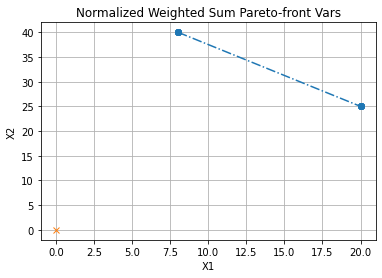

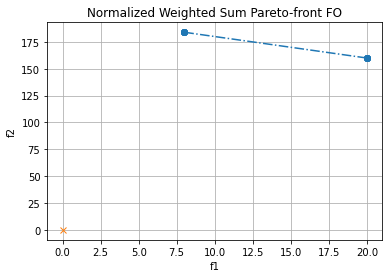

In [ ]:
model = cargarModelo()
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremosLexicographic(model)
n = 10
applyNormalizedWeightingSum(model, f2_min, f2_max, f1_min, f1_max, solver, n)

In [ ]:
def applyNormalEpsilonConstraint(model, f2_min, f2_max, solver, n):

    # Aplico epsilon-restricciones normal

    model.O_f1.activate()
    model.O_f2.deactivate()

    # Creo el parámetro de epsilon y traslado al objetivo f2 a las restricciones.
    model.e = Param(initialize=0, mutable=True)
    model.C_epsilon = Constraint(expr = model.f2 >= model.e)

    # Creo el paso que uso para variar los epsilon
    step = (f2_max - f2_min) / n

    x1_l = []
    x2_l = []
    f1_l = []
    f2_l = []

    # Aplico el proceso iterativo para realizar la búsqueda de las n + 1 soluciones
    i = 0
    while i < n + 1:

        # Varío el valor de epsilon
        model.e = f2_min + i * step
        e_ = f2_min + i * step

        solver.solve(model)

        x1_l.append(value(model.X1))
        x2_l.append(value(model.X2))
        f1_l.append(value(model.f1))
        f2_l.append(value(model.f2))

        print("Epsilon " + str(e_))
        print("Sol vars - it:" + str(i) + " x1= " + str(x1_l[len(x1_l)-1]) + " x2= " + str(x2_l[len(x2_l)-1]))
        print("Sol FO - it:" + str(i) + " f1= " + str(f1_l[len(f1_l)-1]) + " f2= " + str(f2_l[len(f2_l)-1]))

        i = i + 1

    # Para graficar el frente de Pareto hallado en el espacio de decisiones o variables
    plt.plot(x1_l,x2_l,'o-.')
    plt.plot(0,0,'x-.')
    plt.title('Normal epsilon-Constraint Pareto-front Vars')
    plt.xlabel("X1", fontsize = 10)
    plt.ylabel("X2", fontsize = 10) 
    plt.grid(True)
    #plt.savefig("Normal epsilon-Constraint - Vars", dpi = 600, bbox_inches="tight")
    plt.show()
    plt.close()

    # Para graficar el frente de Pareto hallado en el espacio de búsqueda o de objetivos
    plt.plot(f1_l,f2_l,'o-.')
    plt.plot(0,0,'x-.')
    plt.title('Normal epsilon-Constraint Pareto-front FO')
    plt.xlabel("f1", fontsize = 10)
    plt.ylabel("f2", fontsize = 10)    
    plt.grid(True)
    #plt.savefig("Normal epsilon-Constraint - FO", dpi = 600, bbox_inches="tight")
    #files.download("Normal epsilon-Constraint - FO.png") 
    plt.show()
    plt.close()

    # Vuelvo el modelo a su estado original
    model.del_component(model.C_epsilon)
    model.del_component(model.e)

Extremo 1
Primer paso
( X1 , X2 ) = ( 20.0 , 0.0 )
f1 = 20.0
f2 = 60.0
Segundo paso
( X1 , X2 ) = ( 20.0 , 25.0 )
f1 = 20.0
f2 = 160.0
Extremo 2
Primer paso
( X1 , X2 ) = ( 8.0 , 40.0 )
f1 = 8.0
f2 = 184.0
Segundo paso
( X1 , X2 ) = ( 8.0 , 40.0 )
f1 = 8.0
f2 = 184.0
Epsilon 160.0
Sol vars - it:0 x1= 20.0 x2= 25.0
Sol FO - it:0 f1= 20.0 f2= 160.0
Epsilon 160.24
Sol vars - it:1 x1= 19.0 x2= 26.0
Sol FO - it:1 f1= 19.0 f2= 161.0
Epsilon 160.48
Sol vars - it:2 x1= 19.0 x2= 26.0
Sol FO - it:2 f1= 19.0 f2= 161.0
Epsilon 160.72
Sol vars - it:3 x1= 19.0 x2= 26.0
Sol FO - it:3 f1= 19.0 f2= 161.0
Epsilon 160.96
Sol vars - it:4 x1= 19.0 x2= 26.0
Sol FO - it:4 f1= 19.0 f2= 161.0
Epsilon 161.2
Sol vars - it:5 x1= 18.0 x2= 27.0
Sol FO - it:5 f1= 18.0 f2= 162.0
Epsilon 161.44
Sol vars - it:6 x1= 18.0 x2= 27.0
Sol FO - it:6 f1= 18.0 f2= 162.0
Epsilon 161.68
Sol vars - it:7 x1= 18.0 x2= 27.0
Sol FO - it:7 f1= 18.0 f2= 162.0
Epsilon 161.92
Sol vars - it:8 x1= 18.0 x2= 27.0
Sol FO - it:8 f1= 18.0 f2= 16

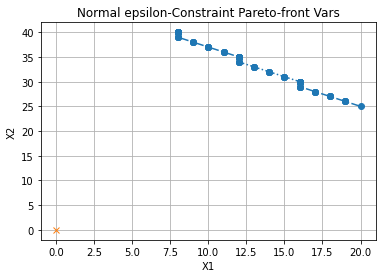

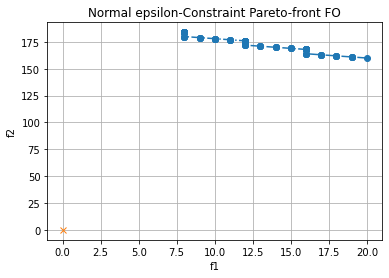

In [ ]:
model = cargarModelo_int()
#model = cargarModelo_nl_int()
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremosLexicographic(model)
n = 100
applyNormalEpsilonConstraint(model, f2_min, f2_max, solver, n)

In [ ]:
def applyAugmentedEpsilonConstraint(model, f2_min, f2_max, solver, n):

    # Aplico epsilon-restricciones aumentado

    model.O_f1.deactivate()
    model.O_f2.deactivate()
    
    # Creo el parámetro de epsilon y traslado al objetivo f2 a las restricciones.
    model.e = Param(initialize=0, mutable=True)
    model.C_e = Constraint(expr = model.f2 - model.s == model.e)    

    # Creo la variable de holgura de la restricción asociada a f2 y arma la nueva función objetivo.
    model.s = Var(within=NonNegativeReals)
    model.delta = Param(initialize=0.00001)
    model.O_f = Objective(expr = model.f1 + model.delta * model.s / (f2_max - f2_min), sense=maximize)
    
    x1_l = []
    x2_l = []
    f1_l = []
    f2_l = []

    # Creo el paso que uso para variar los epsilon
    step = (f2_max - f2_min)/n
    
    # Aplico el proceso iterativo para realizar la búsqueda de las n + 1 soluciones
    i = 0
    redundant_it = 0
    while i < n + 1:
        # Varío el valor de epsilon
        e_ = f2_min + i * step
        model.e = f2_min + i * step

        solver.solve(model)

        x1_l.append(value(model.X1))
        x2_l.append(value(model.X2))
        f1_l.append(value(model.f1))
        f2_l.append(value(model.f2))

        print("Epsilon " + str(e_))
        print("Sol vars - it:" + str(i) + " x1= " + str(x1_l[len(x1_l)-1]) + " x2= " + str(x2_l[len(x2_l)-1]))
        print("Sol FO - it:" + str(i) + " f1= " + str(f1_l[len(f1_l)-1]) + " f2= " + str(f2_l[len(f2_l)-1]))

        # Chequeo si la siguiente iteración proporcionaría la misma solución ya hallada
        # comparando la varbiable de holgura del objetivo f2 con el paso.
        b = floor(value(model.s)/step)
        # Si la siguiente iteración proporcionará la misma solución ya hallada, la salteo (b > 0). Sino b = 0 y el contador se incrementa sólo en 1
        if b > 0:
            redundant_it += 1
        i = i + b + 1

    # Para graficar el frente de Pareto hallado en el espacio de decisiones o variables
    plt.plot(x1_l,x2_l,'o-.')
    plt.plot(0,0,'x-.')
    plt.title('Augmented epsilon-Constraint Pareto-front Vars')
    plt.xlabel("X1", fontsize = 10)
    plt.ylabel("X2", fontsize = 10)    
    plt.grid(True)
    #plt.savefig("Augmented epsilon-Constraint - Vars", dpi = 600, bbox_inches="tight")
    plt.show()
    plt.close()

    # Para graficar el frente de Pareto hallado en el espacio de búsqueda o de objetivos
    plt.plot(f1_l,f2_l,'o-.')
    plt.plot(0,0,'x-.')
    plt.title('Augmented epsilon-Constraint Pareto-front FO')
    plt.xlabel("f1", fontsize = 10)
    plt.ylabel("f2", fontsize = 10)    
    plt.grid(True)
    #plt.savefig("Augmented epsilon-Constraint - FO", dpi = 600, bbox_inches="tight")    
    plt.show()
    plt.close()

    # Vuelvo el modelo a su estado original
    model.del_component(model.O_f)
    model.del_component(model.delta)
    model.del_component(model.e)
    model.del_component(model.s)
    model.del_component(model.C_e)

Extremo 1
Primer paso
( X1 , X2 ) = ( 20.0 , 0.0 )
f1 = 20.0
f2 = 60.0
Segundo paso
( X1 , X2 ) = ( 20.0 , 25.0 )
f1 = 20.0
f2 = 160.0
Extremo 2
Primer paso
( X1 , X2 ) = ( 8.0 , 40.0 )
f1 = 8.0
f2 = 184.0
Segundo paso
( X1 , X2 ) = ( 8.0 , 40.0 )
f1 = 8.0
f2 = 184.0
Epsilon 160.0
Sol vars - it:0 x1= 20.0 x2= 25.0
Sol FO - it:0 f1= 20.0 f2= 160.0
Epsilon 160.24
Sol vars - it:1 x1= 19.0 x2= 26.0
Sol FO - it:1 f1= 19.0 f2= 161.0
Epsilon 161.2
Sol vars - it:5 x1= 18.0 x2= 27.0
Sol FO - it:5 f1= 18.0 f2= 162.0
Epsilon 162.16
Sol vars - it:9 x1= 17.0 x2= 28.0
Sol FO - it:9 f1= 17.0 f2= 163.0
Epsilon 163.12
Sol vars - it:13 x1= 16.0 x2= 30.0
Sol FO - it:13 f1= 16.0 f2= 168.0
Epsilon 168.16
Sol vars - it:34 x1= 15.0 x2= 31.0
Sol FO - it:34 f1= 15.0 f2= 169.0
Epsilon 169.12
Sol vars - it:38 x1= 14.0 x2= 32.0
Sol FO - it:38 f1= 14.0 f2= 170.0
Epsilon 170.08
Sol vars - it:42 x1= 13.0 x2= 33.0
Sol FO - it:42 f1= 13.0 f2= 171.0
Epsilon 171.04
Sol vars - it:46 x1= 12.0 x2= 35.0
Sol FO - it:46 f1= 1

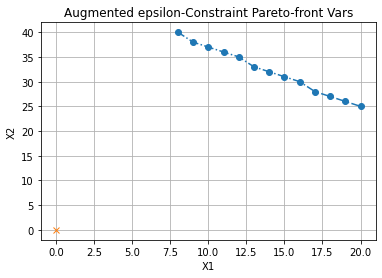

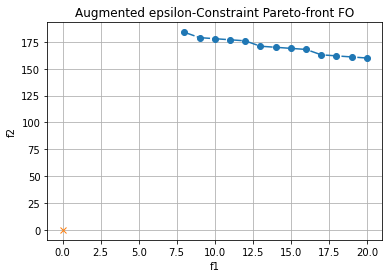

In [ ]:
#model = cargarModelo()
model = cargarModelo_int()
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremosLexicographic(model)
n = 100
applyAugmentedEpsilonConstraint(model, f2_min, f2_max, solver, n)

In [ ]:
def goalProgramming(model, f2_max, f1_max, solver, goals_, pesosPos_, pesosNeg_):

    # Aplico programación por metas e incorporo algunas cuestiones para generar modelos en pyomo 

    model.O_f1.deactivate()
    model.O_f2.deactivate()
    
    # Generación de conjunto de los objetivos
    model.M = Set(initialize = range(2)) 

    # Generación de parámetros indexados en el conjunto de los objetivos previamente creado.
    # Tomo las metas y los pesos (goals_, pesosPos_, pesosNeg_) que están en estructuras de Python plano (listas) y los paso a estructuras de Pyomo
    # Parámetro de metas
    def goals_rule(model,m):
      return goals_[m]
    model.goals = Param(model.M, initialize=goals_rule, within=NonNegativeReals)
    # Parámetro de pesos asignado a la desviación positiva
    def pesosPos_rule(model,m):
      return pesosPos_[m]
    model.pesosPos = Param(model.M, initialize=pesosPos_rule, within=NonNegativeReals)
    # Parámetro de pesos asignado a la desviación negativa
    def pesosNeg_rule(model,m):
      return pesosNeg_[m]
    model.pesosNeg = Param(model.M, initialize=pesosNeg_rule, within=NonNegativeReals)

    # Generación de variables indexadas en el conjunto de los objetivos previamente creado.
    # Variable de desviación positiva
    model.devPos = Var(model.M, within=NonNegativeReals)
    # Variable de desviación negativa
    model.devNeg = Var(model.M, within=NonNegativeReals)

    # Creo objetivo a através de una función
    def Objective_rule(model):
        return sum(model.devPos[m] * model.pesosPos[m] + model.devNeg[m] * model.pesosNeg[m] for m in model.M)
    model.O_f = Objective(rule=Objective_rule  , sense=minimize)

    # Creo restricciones para las metas
    def goalsConstraint_rule(model,m):
        if  m == model.M.first():
           return model.f1/f1_max + model.devNeg[m] - model.devPos[m] == model.goals[m]/f1_max
        if  m == model.M.last():
           return model.f2/f2_max + model.devNeg[m] - model.devPos[m] == model.goals[m]/f2_max
    model.goalsConstraint = Constraint(model.M, rule=goalsConstraint_rule)
   
    solver.solve(model)

    x1_l = []
    x2_l = []
    f1_l = []
    f2_l = []

    x1_l.append(value(model.X1))
    x2_l.append(value(model.X2))
    f1_l.append(value(model.f1))
    f2_l.append(value(model.f2))
    
    print("Sol vars " + str(x1_l[len(x1_l)-1]) + " " + str(x2_l[len(x2_l)-1]))
    print("Sol FO " + str(f1_l[len(f1_l)-1]) + " " + str(f2_l[len(f2_l)-1]))
    
    # Para graficar la solución hallada en el espacio de decisiones o variables
    plt.plot(x1_l,x2_l,'o-.')
    plt.title('Goal Programming solution Vars')
    plt.xlabel("X1", fontsize = 10)
    plt.ylabel("X2", fontsize = 10)    
    plt.grid(True)
    #files.download("Goal Programming solution Vars.png") 
    plt.show()
    plt.close()

    # Para graficar la solución hallada en el espacio de búsqueda o de objetivos
    plt.plot(f1_l,f2_l,'o-.')
    plt.title('Goal Programming solution FO')
    plt.xlabel("f1", fontsize = 10)
    plt.ylabel("f2", fontsize = 10)    
    plt.grid(True)
    #files.download("Goal Programming solution FO.png") 
    plt.show()
    plt.close()

    # Vuelvo el modelo a su estado original
    model.del_component(model.O_f)
    model.del_component(model.goalsConstraint)
    model.del_component(model.goals)
    model.del_component(model.pesosNeg)
    model.del_component(model.pesosPos)
    model.del_component(model.devPos)
    model.del_component(model.devNeg)
    model.del_component(model.M)

Extremo 1
Primer paso
( X1 , X2 ) = ( 20.000000199990012 , 4.779338185084407 )
f1 = 20.000000199990012
f2 = 79.11735334030767
Segundo paso
( X1 , X2 ) = ( 20.000000000472365 , 25.000000499164017 )
f1 = 20.000000000472365
f2 = 160.00000199807317
Extremo 2
Primer paso
( X1 , X2 ) = ( 8.000000080001664 , 40.000000399993745 )
f1 = 8.000000080001664
f2 = 184.00000183997997
Segundo paso
( X1 , X2 ) = ( 8.000000999990018 , 39.99999925000748 )
f1 = 8.000000999990018
f2 = 183.99999999999997
Sol vars 12.500000999412185 34.374999249734664
Sol FO 12.500000999412185 174.9999999971752


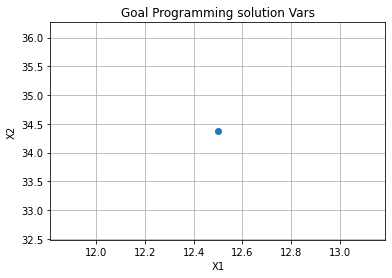

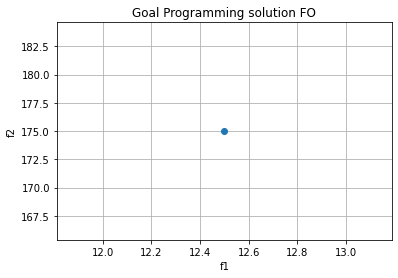

In [ ]:
model = cargarModelo()
f2_min, f2_max, f1_min, f1_max, solver = encontrarExtremosLexicographic(model)
goals_ = [20,175]
pesosPos_ = [0.1,0.9]
pesosNeg_ = [0.1,0.9]
goalProgramming(model, f2_max, f1_max, solver, goals_, pesosPos_, pesosNeg_)